In [179]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Describe datas

### Preprocessing

In [180]:
# data
df1 = pd.read_csv("../data/data2.csv")

print(max(df1.count(axis=0)))

#preprocessing:
df1.drop_duplicates(inplace=True)
df1 = df1[(df1['CVSS'] != 'Non disponible') & (df1['CWE'] != 'Non disponible')]

#df1.drop(inplace=True, columns=['Versions affectées','Produit','Lien', 'Base Severity', 'CVE', 'Description', 'ID_ANSSI', 'Titre'])

#df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce').dt.year

# enelver les redondance
# sur 'CVSS'/'CWE' drop tt 'Non disponible'
# si la colone 'Version affecté' est corrélé à la premiere ACP, la supprimer.
# 'Éditeur', 'Type' get dummies
# 'Lien', 'Base Severity', 'CVE', 'Description', 'ID_ANSII' ca sert à rien
X = df1[['CVSS', 'EPSS', 'CWE', 'Éditeur']]
X['CVSS'] = pd.to_numeric(X['CVSS'], errors='coerce')
X = pd.get_dummies(X, columns=['Éditeur', 'CWE'])
#X = X.apply(pd.to_numeric, errors='coerce')
X.dropna()
X = X.astype(float)
#print(X.head())

print(max(X.count(axis=0)))


# Centrée-réduite
X_scaled = StandardScaler().fit_transform(X)
#print(max(df1.count(axis=0)))
X.head()


3561
1525


/var/folders/s8/0f2wgqdd6953wlwbgn3cr_480000gn/T/ipykernel_47450/667310733.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['CVSS'] = pd.to_numeric(X['CVSS'], errors='coerce')


,CVSS,EPSS,Éditeur_Adobe,Éditeur_Apache Software Foundation,Éditeur_Cisco,Éditeur_Cure53,Éditeur_Elastic,Éditeur_Fedora,Éditeur_Fortinet,Éditeur_GitLab,...,CWE_CWE-843,CWE_CWE-862,CWE_CWE-863,CWE_CWE-89,CWE_CWE-90,CWE_CWE-908,CWE_CWE-918,CWE_CWE-923,CWE_CWE-94,CWE_CWE-943
2,7.1,0.00407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.5,0.00044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6.5,0.00044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5.4,0.00029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,5.4,0.00029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### PCA

In [181]:
pca = PCA(n_components=None)
pca_result = pca.fit_transform(X_scaled)

### Analyses des composantes Principales

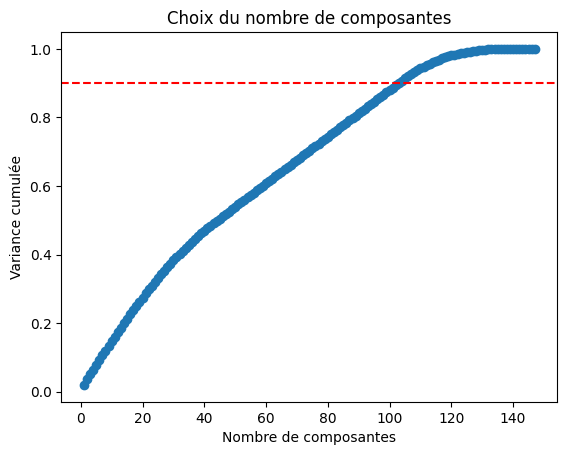

In [182]:
#### Choix du nombre de composantes
explained_var = pca.explained_variance_ratio_
cum_var = explained_var.cumsum()

plt.plot(range(1, len(cum_var)+1), cum_var, marker='o')
plt.axhline(0.9, color='r', linestyle='--')  # Par ex. garder 90% de variance
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance cumulée')
plt.title('Choix du nombre de composantes')
plt.show()

On voit que le nombre d'axes qu'on devrait garder pour avoir une bonne représentativité est 80.

In [183]:
# Corrélation entre variables initiales et composantes principales
correlations = pd.DataFrame(pca.components_.T * np.sqrt(pca.explained_variance_),
                            index=X.columns,
                            columns=[f'PC{i+1}' for i in range(len(X.columns))])

# Contributions : valeur absolue des poids normalisés
contribs = correlations.abs()
contribs = contribs.div(contribs.sum(axis=0), axis=1)

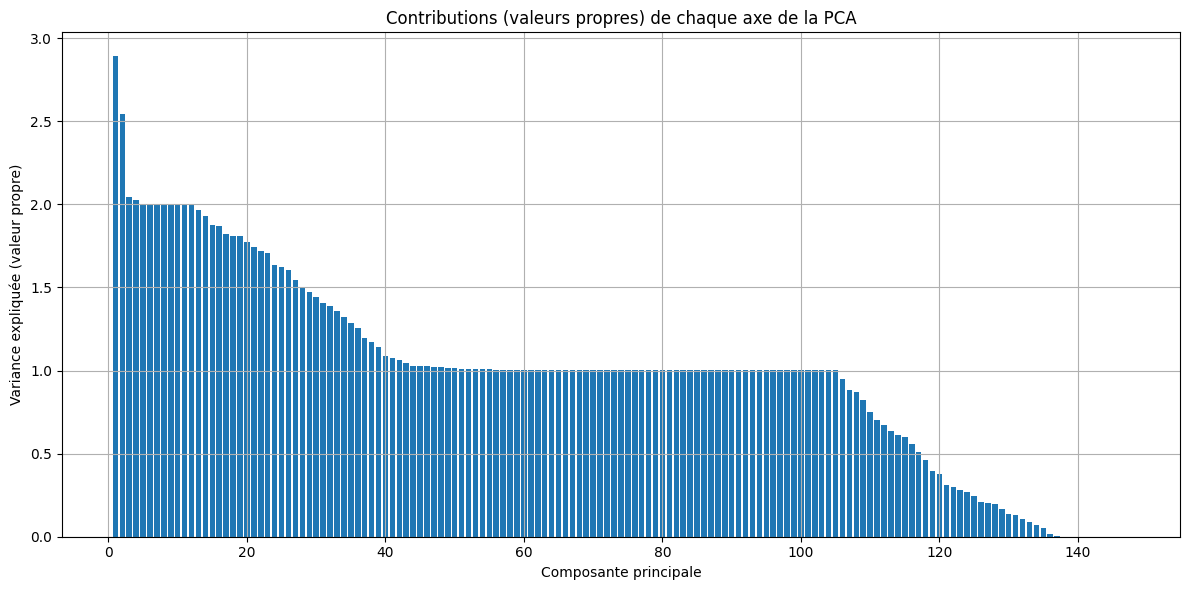

In [184]:

plt.figure(figsize=(12, 6))
plt.bar(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_)
plt.xlabel("Composante principale")
plt.ylabel("Variance expliquée (valeur propre)")
plt.title("Contributions (valeurs propres) de chaque axe de la PCA")
plt.grid(True)
# Vérifier que explained_var est bien défini

plt.tight_layout()
plt.show()

Par souci de représentativité, on se cantonnera à 2 axes

/var/folders/s8/0f2wgqdd6953wlwbgn3cr_480000gn/T/ipykernel_47450/3854897984.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_pc1.index, x=top_pc1.values, palette="Blues_d")
/var/folders/s8/0f2wgqdd6953wlwbgn3cr_480000gn/T/ipykernel_47450/3854897984.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_pc2.index, x=top_pc2.values, palette="Greens_d")


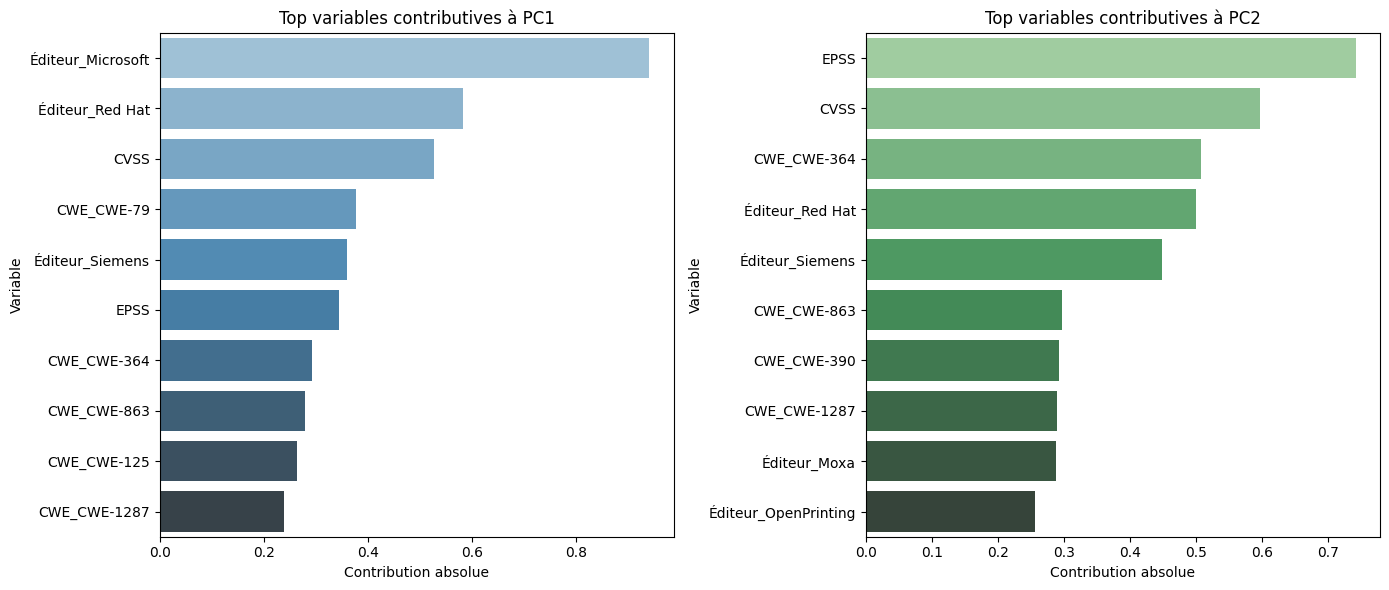

In [185]:
contribs_pc1_pc2 = correlations[['PC1', 'PC2']].abs()


top_n = 10  # variables les plus contributives pour chaque axe
top_pc1 = contribs_pc1_pc2['PC1'].sort_values(ascending=False).head(top_n)
top_pc2 = contribs_pc1_pc2['PC2'].sort_values(ascending=False).head(top_n)



plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(y=top_pc1.index, x=top_pc1.values, palette="Blues_d")
plt.title("Top variables contributives à PC1")
plt.xlabel("Contribution absolue")
plt.ylabel("Variable")

plt.subplot(1, 2, 2)
sns.barplot(y=top_pc2.index, x=top_pc2.values, palette="Greens_d")
plt.title("Top variables contributives à PC2")
plt.xlabel("Contribution absolue")
plt.ylabel("Variable")

plt.tight_layout()
plt.show()

### Cercle de Corrélation

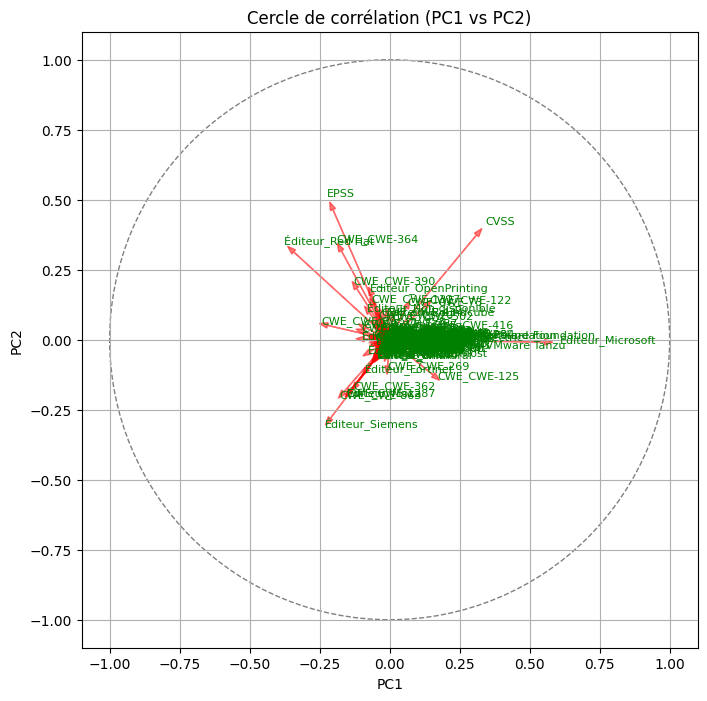

In [186]:
plt.figure(figsize=(8, 8))
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Afficher les flèches pour chaque variable
for i in range(len(X.columns)):
    plt.arrow(0, 0, 
              pca.components_[0, i], 
              pca.components_[1, i], 
              color='r', alpha=0.5, head_width=0.02)
    plt.text(pca.components_[0, i]*1.1, 
             pca.components_[1, i]*1.1, 
             X.columns[i], color='g', fontsize=8)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Cercle de corrélation (PC1 vs PC2)")
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.grid()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

### PCA 2

In [187]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

### Visualisation

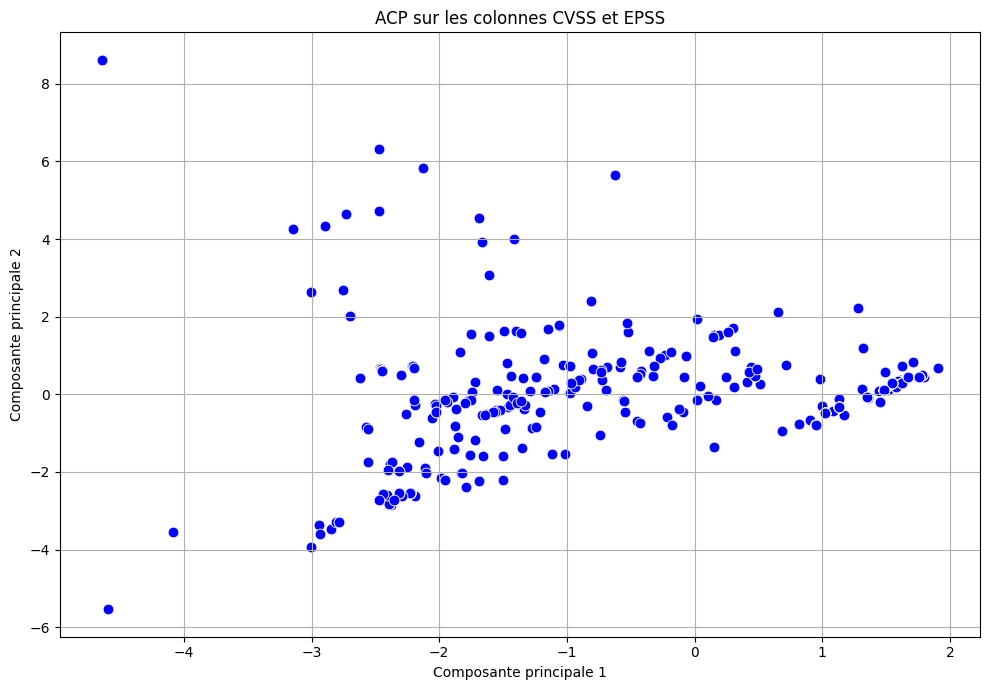

In [188]:

# Convertir en DataFrame pour visualisation
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])

# Visualiser
plt.figure(figsize=(10, 7))
sns.scatterplot(x="PC1", y="PC2", data=pca_df, s=60, color='blue')
plt.title("ACP sur les colonnes CVSS et EPSS")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.grid(True)
plt.tight_layout()
plt.show()

## KMeans

### KMeans - elbow methods

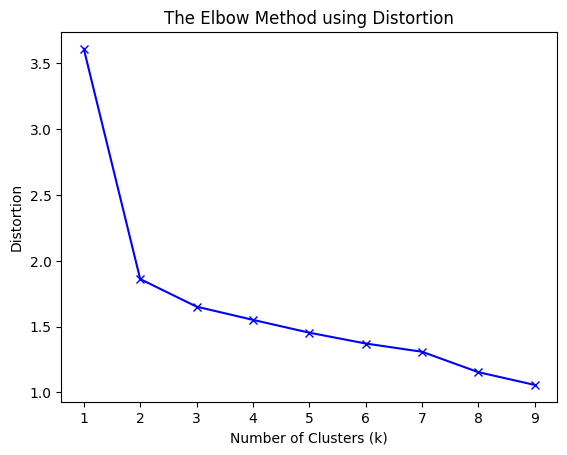

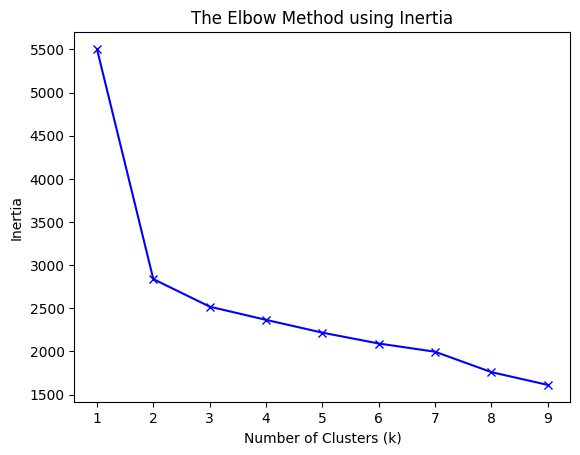

In [191]:
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    
    kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)**2) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
    
    mapping1[k] = distortions[-1]
    mapping2[k] = inertias[-1]

#distortion
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

#inertie
plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

Le nombre de clusters optimal est 2.

### KMeans x PCA

Silhouette scores (CV): [np.float64(0.5926096351502156), np.float64(0.5185189789279003), np.float64(0.5935621195655834), np.float64(0.5935776406639525), np.float64(0.6034101323829064)]
Silhouette score moyen: 0.5803357013381116


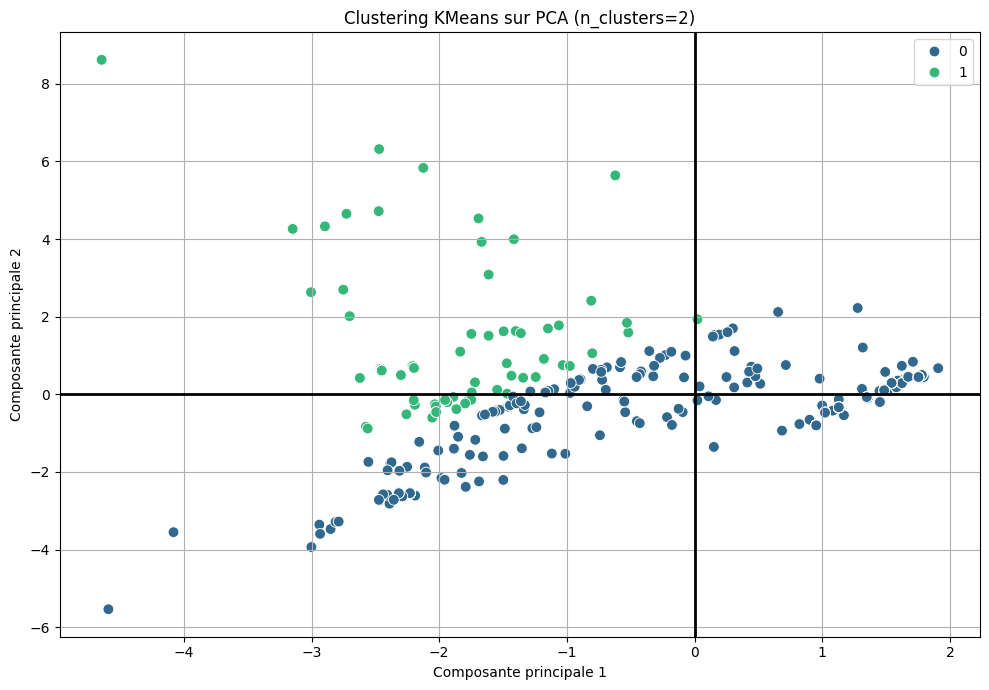

In [195]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import silhouette_score

# KMeans sur les données PCA
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto")
cluster_labels = kmeans.fit_predict(pca_df)

# Cross-validation

cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []
for train_idx, test_idx in cv.split(pca_df):
    kmeans_cv = KMeans(n_clusters=2, random_state=0, n_init="auto")
    labels_cv = kmeans_cv.fit_predict(pca_df.iloc[train_idx])
    score = silhouette_score(pca_df.iloc[train_idx], labels_cv)
    scores.append(score)
print("Silhouette scores (CV):", scores)
print("Silhouette score moyen:", np.mean(scores))

# Visualisation
plt.figure(figsize=(10, 7))
sns.scatterplot(x="PC1", y="PC2", data=pca_df, hue=cluster_labels, palette='viridis', s=60)
plt.title("Clustering KMeans sur PCA (n_clusters=2)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.grid(True)
# Ajout des lignes x=0 et y=0 en plus gras
plt.axhline(0, color='black', linewidth=2)
plt.axvline(0, color='black', linewidth=2)
plt.tight_layout()
plt.show()


### Analyses

In [193]:
# Ajout des labels de cluster au DataFrame PCA
pca_df['cluster'] = cluster_labels

# On récupère les index des lignes d'origine correspondant à chaque cluster
df1_clustered = df1.copy()
df1_clustered['cluster'] = cluster_labels

# Conversion des colonnes CVSS et EPSS au bon type
df1_clustered['CVSS'] = pd.to_numeric(df1_clustered['CVSS'], errors='coerce')
df1_clustered['EPSS'] = pd.to_numeric(df1_clustered['EPSS'], errors='coerce')

# Analyse descriptive par groupe
def describe_group(group):
    return pd.Series({
        'CVSS_mean': group['CVSS'].mean(),
        'CVSS_min': group['CVSS'].min(),
        'CVSS_max': group['CVSS'].max(),
        'EPSS_mean': group['EPSS'].mean(),
        'EPSS_min': group['EPSS'].min(),
        'EPSS_max': group['EPSS'].max(),
        'CWE_counts': group['CWE'].value_counts().to_dict()
    })

desc_df = df1_clustered.groupby('cluster').apply(describe_group)

# Pour afficher joliment les counts CWE, on peut les convertir en DataFrame séparée si besoin
desc_df

/var/folders/s8/0f2wgqdd6953wlwbgn3cr_480000gn/T/ipykernel_47450/2266803507.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  desc_df = df1_clustered.groupby('cluster').apply(describe_group)


,CVSS_mean,CVSS_min,CVSS_max,EPSS_mean,EPSS_min,EPSS_max,CWE_counts
cluster,,,,,,,
0,6.760503,0.0,9.9,0.007355,0.00005,0.27895,"{'CWE-125': 252, 'CWE-122': 111, 'CWE-416': 11..."
1,6.420548,3.0,10.0,0.172386,0.00011,0.91689,"{'CWE-79': 105, 'CWE-364': 50, 'CWE-770': 18, ..."
